In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score 
from sklearn.model_selection import train_test_split
import plotly.express as pe
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
mushroom_df = pd.read_csv('mushroom.csv')
mushroom_df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


# Exploring Data (EDA)

In [3]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
mushroom_df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [5]:
mushroom_df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

- No missing values detected.

In [6]:
mushroom_df.duplicated().sum()

np.int64(1024)

- The dataset has so many duplicate rows that are repeated.
- Duplicate rows/values can lead to similar results, so dropping the duplicate rows.

# Cleaning Data for Model Building
**OR**
# Data Pre-Processing

1. **Why Drop Duplicates ?**

- Redundant Information: Duplicate rows do not add new information to the model and can increase training time unnecessarily.
- Bias in Training: If certain instances are repeated, they might bias the model towards those instances, affecting generalization.
- Improved Model Performance: Removing duplicates can help the model focus on learning patterns rather than memorizing repeated data points.

In [7]:
# Removing duplicate rows
print(f"Original dataset size before removing duplicates: {mushroom_df.shape}")

Original dataset size before removing duplicates: (2000, 26)


In [8]:
mushroom_df.drop_duplicates(inplace=True)

In [9]:
print(f"Dataset size after removing duplicates: {mushroom_df.shape}")

Dataset size after removing duplicates: (976, 26)


In [10]:
# Encoding Categorical Features

label_encoders = {}
for column in mushroom_df.columns:
    le = LabelEncoder()
    mushroom_df[column] = le.fit_transform(mushroom_df[column])
    label_encoders[column] = le

In [11]:
mushroom_df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


# Feature Selection

In [12]:
# Feature Selection and Importance Analysis using ANOVA F-test.

from sklearn.feature_selection import SelectKBest, f_classif

In [13]:
# Separating the target variable.classes_

df_x = mushroom_df.drop(columns='class')
df_y = mushroom_df['class']

In [14]:
# Using ANOVA F-score test to get the feature importance
f_scores, p_values = f_classif(df_x, df_y)
anova_importance = pd.DataFrame({'Feature': df_x.columns, 'F-Score': f_scores, 'P-Value': p_values})
anova_importance = anova_importance.sort_values(by='F-Score', ascending=False)
print("Feature Importance using ANOVA F-score:\n", anova_importance)

Feature Importance using ANOVA F-score:
                      Feature   F-Score   P-Value
14    stalk_color_above_ring  3.045664  0.081268
3                  cap_color  2.318897  0.128135
2                cap_surface  2.230414  0.135641
7               gill_spacing  1.986991  0.158975
18               ring_number  1.778605  0.182632
23              stalk_height  1.395119  0.237831
22                   habitat  1.232741  0.267149
10               stalk_shape  0.818223  0.365924
17                veil_color  0.656570  0.417971
20         spore_print_color  0.554424  0.456695
6            gill_attachment  0.550066  0.458470
0                 Unnamed: 0  0.432817  0.510765
8                  gill_size  0.384033  0.535598
11                stalk_root  0.378257  0.538681
21                population  0.214774  0.643154
13  stalk_surface_below_ring  0.208671  0.647913
19                 ring_type  0.153537  0.695263
15    stalk_color_below_ring  0.142524  0.705866
5                       odor

- Based on the ANOVA F-score, we typically select features with higher F-Scores (generally above 1.5) and lower P-values (typically < 0.2).

- Important Columns/Features according to F-test

| Feature                  |
|--------------------------|
| stalk_color_above_ring   |
| cap_color               |
| cap_surface             |
| gill_spacing            |
| ring_number             |
| stalk_height            |
| habitat                 |

In [15]:
# Taking the above 7 features for training the model

x = mushroom_df[['stalk_color_above_ring', 'gill_spacing', 'cap_color', 'cap_surface', 'ring_number', 'stalk_height', 'habitat']]
y = mushroom_df['class']

# Scaling The Data

In [16]:
# Scaling the features

scaler = StandardScaler()

scaled_data = scaler.fit_transform(x)
scaled_data = pd.DataFrame(scaled_data, columns=x.columns)

scaled_data.head()

,stalk_color_above_ring,gill_spacing,cap_color,cap_surface,ring_number,stalk_height,habitat
0,-0.361945,1.231683,1.172339,0.410285,1.280815,1.531553,0.994621
1,-0.750567,0.002519,0.791192,-1.405763,1.280815,-1.265390,0.994621
2,1.581168,0.002519,0.410045,-0.497739,1.280815,0.186323,0.994621
3,1.581168,-1.226646,0.028898,0.410285,1.280815,-0.889151,-1.576222
4,-0.361945,0.002519,1.553486,1.318310,-1.182388,1.457015,0.480453


# Data Visualization

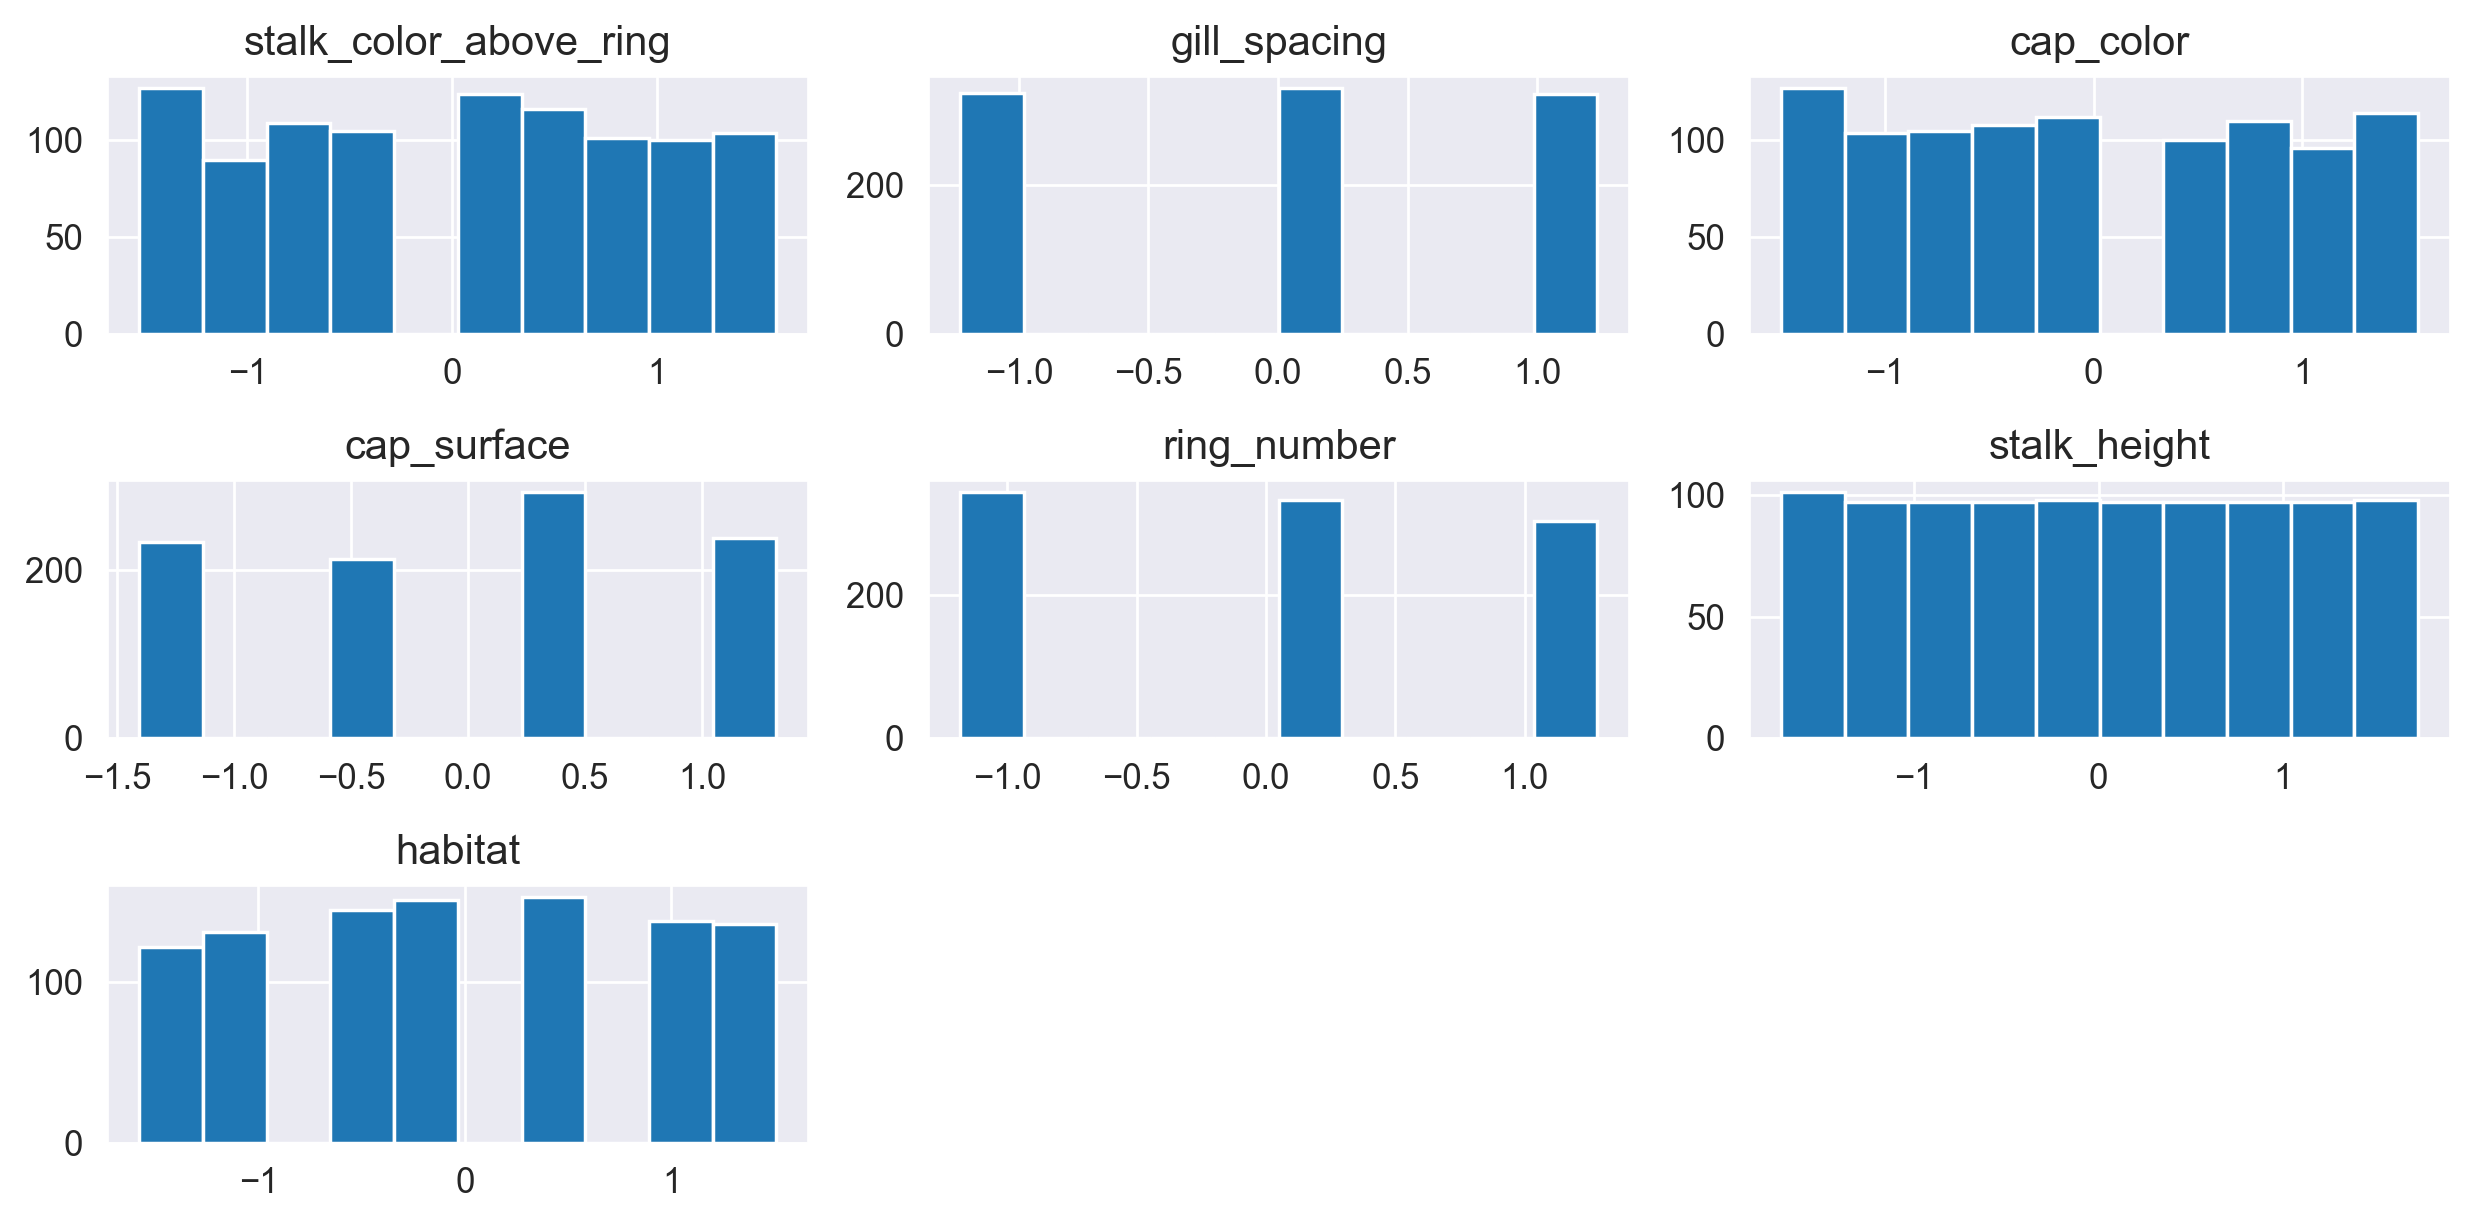

In [17]:
scaled_data.hist()
plt.tight_layout()

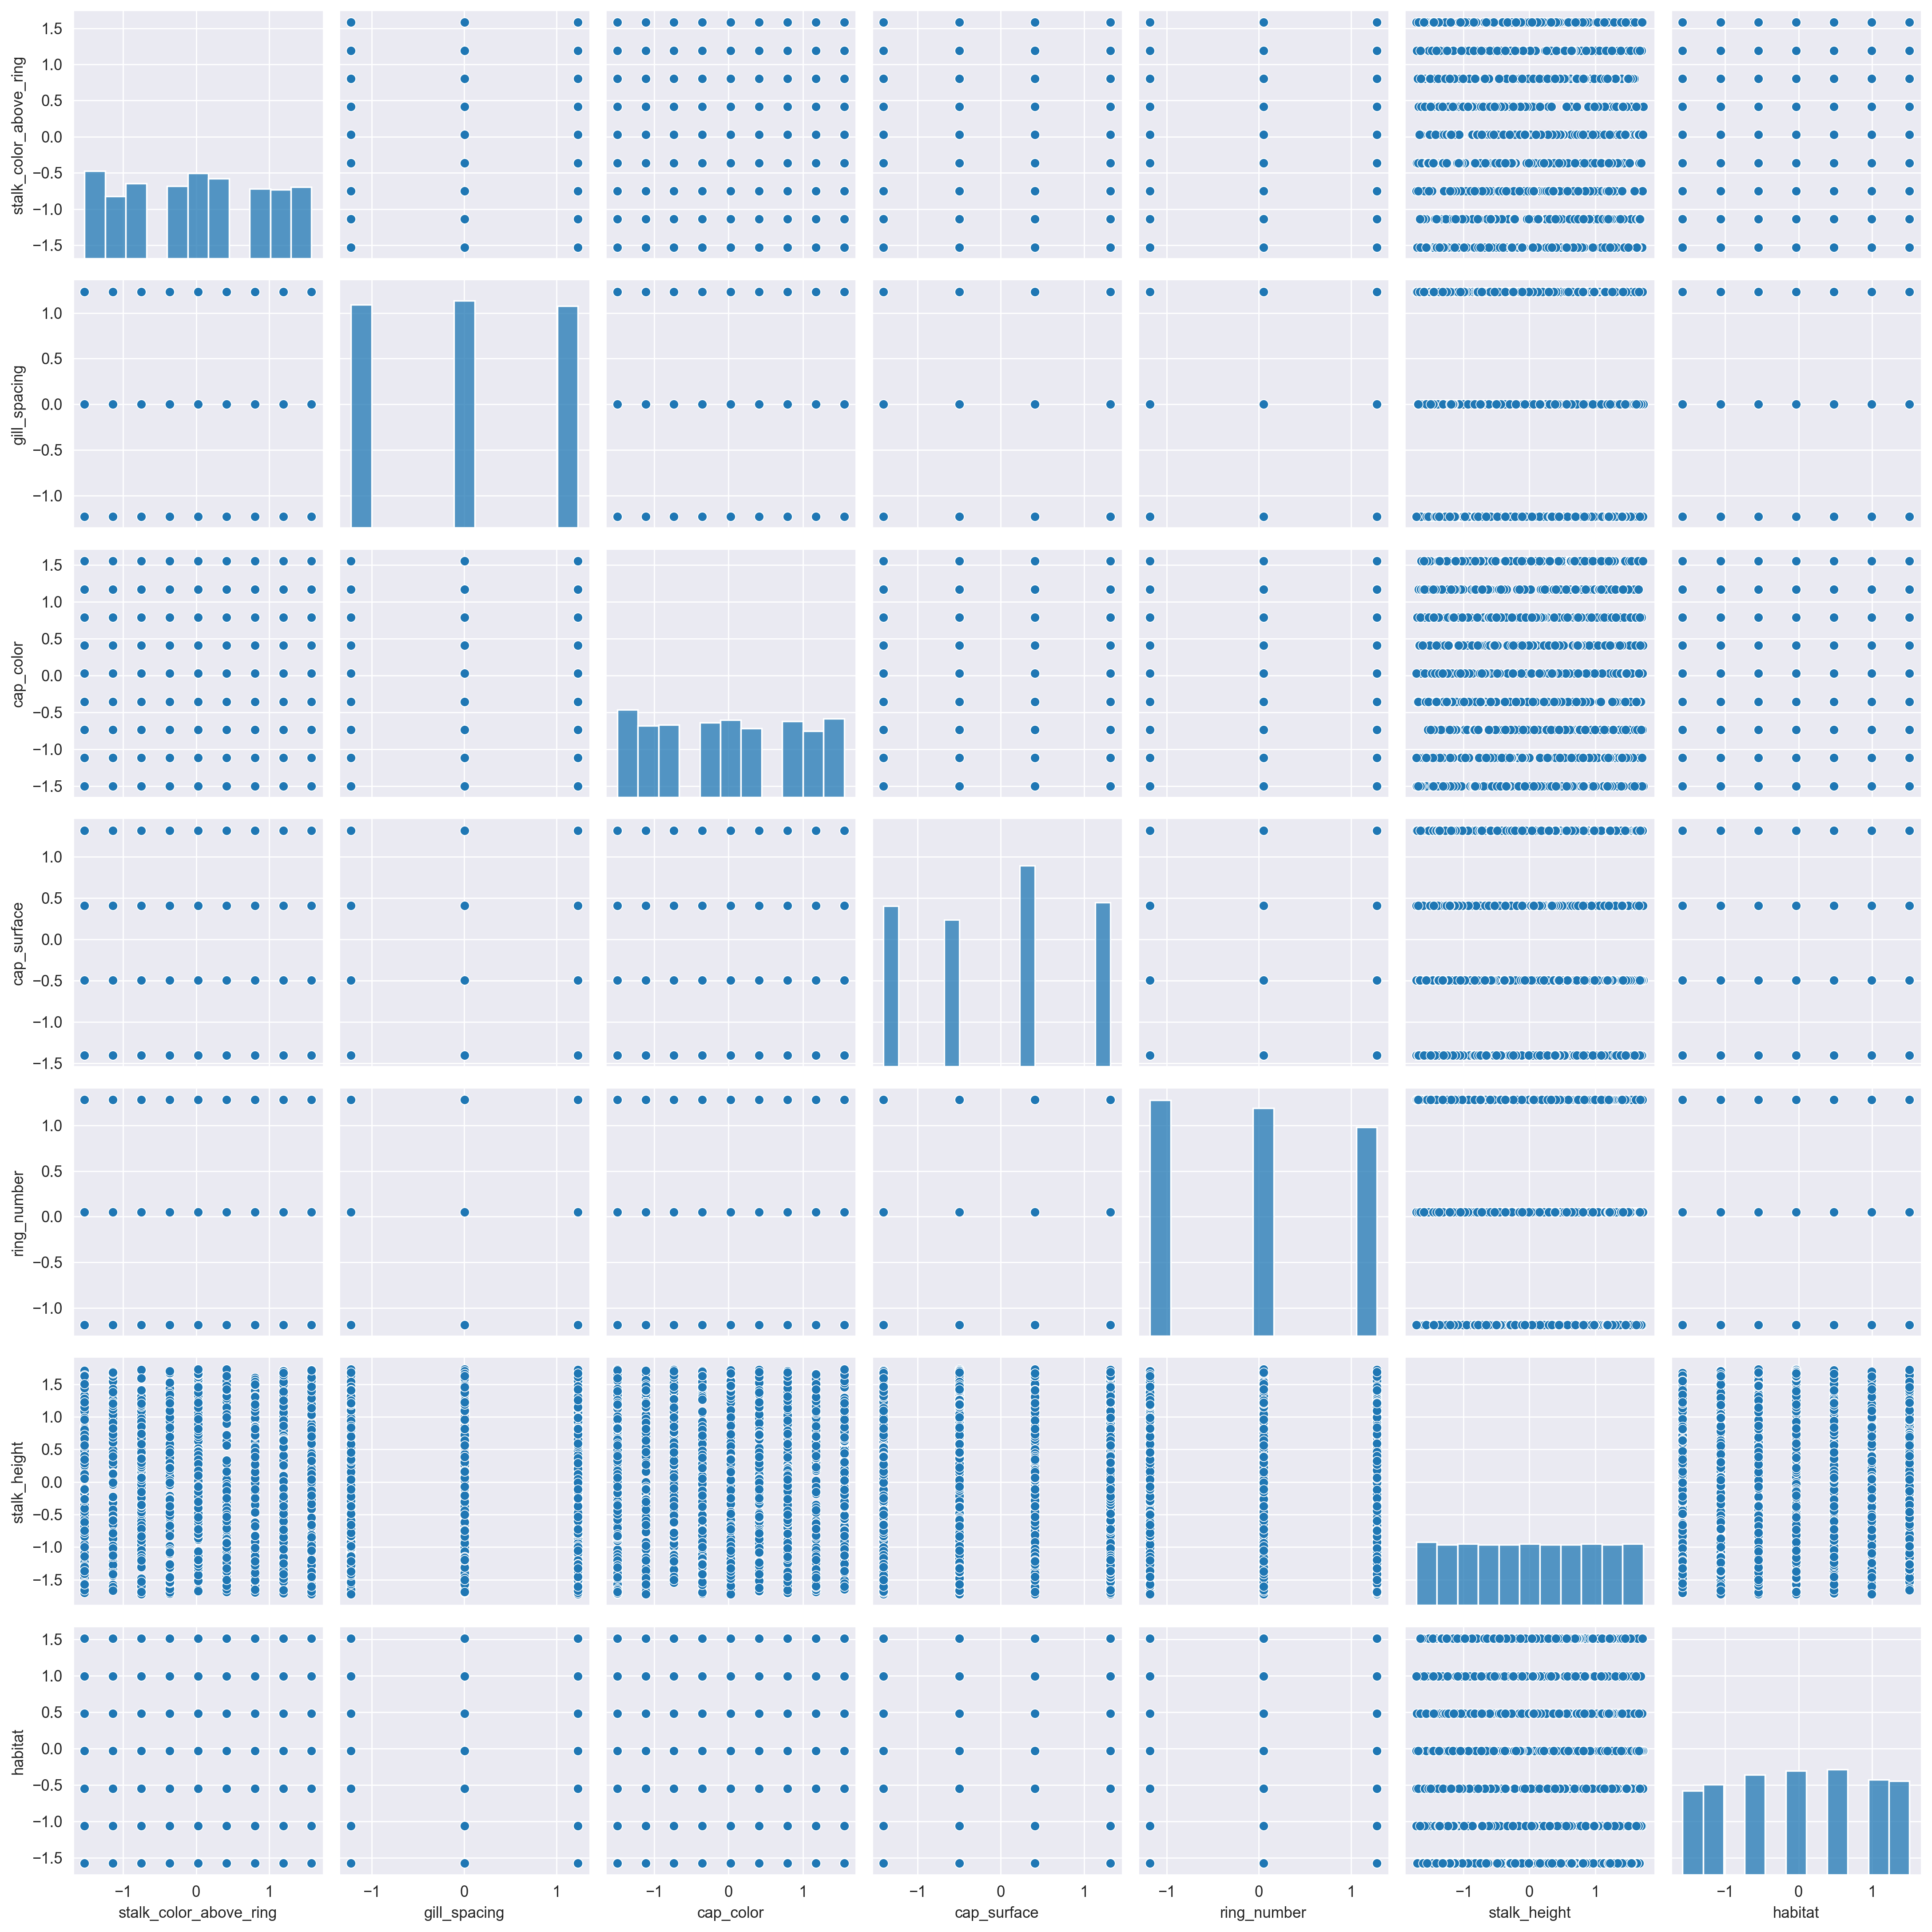

In [18]:
sns.pairplot(scaled_data)
plt.tight_layout()

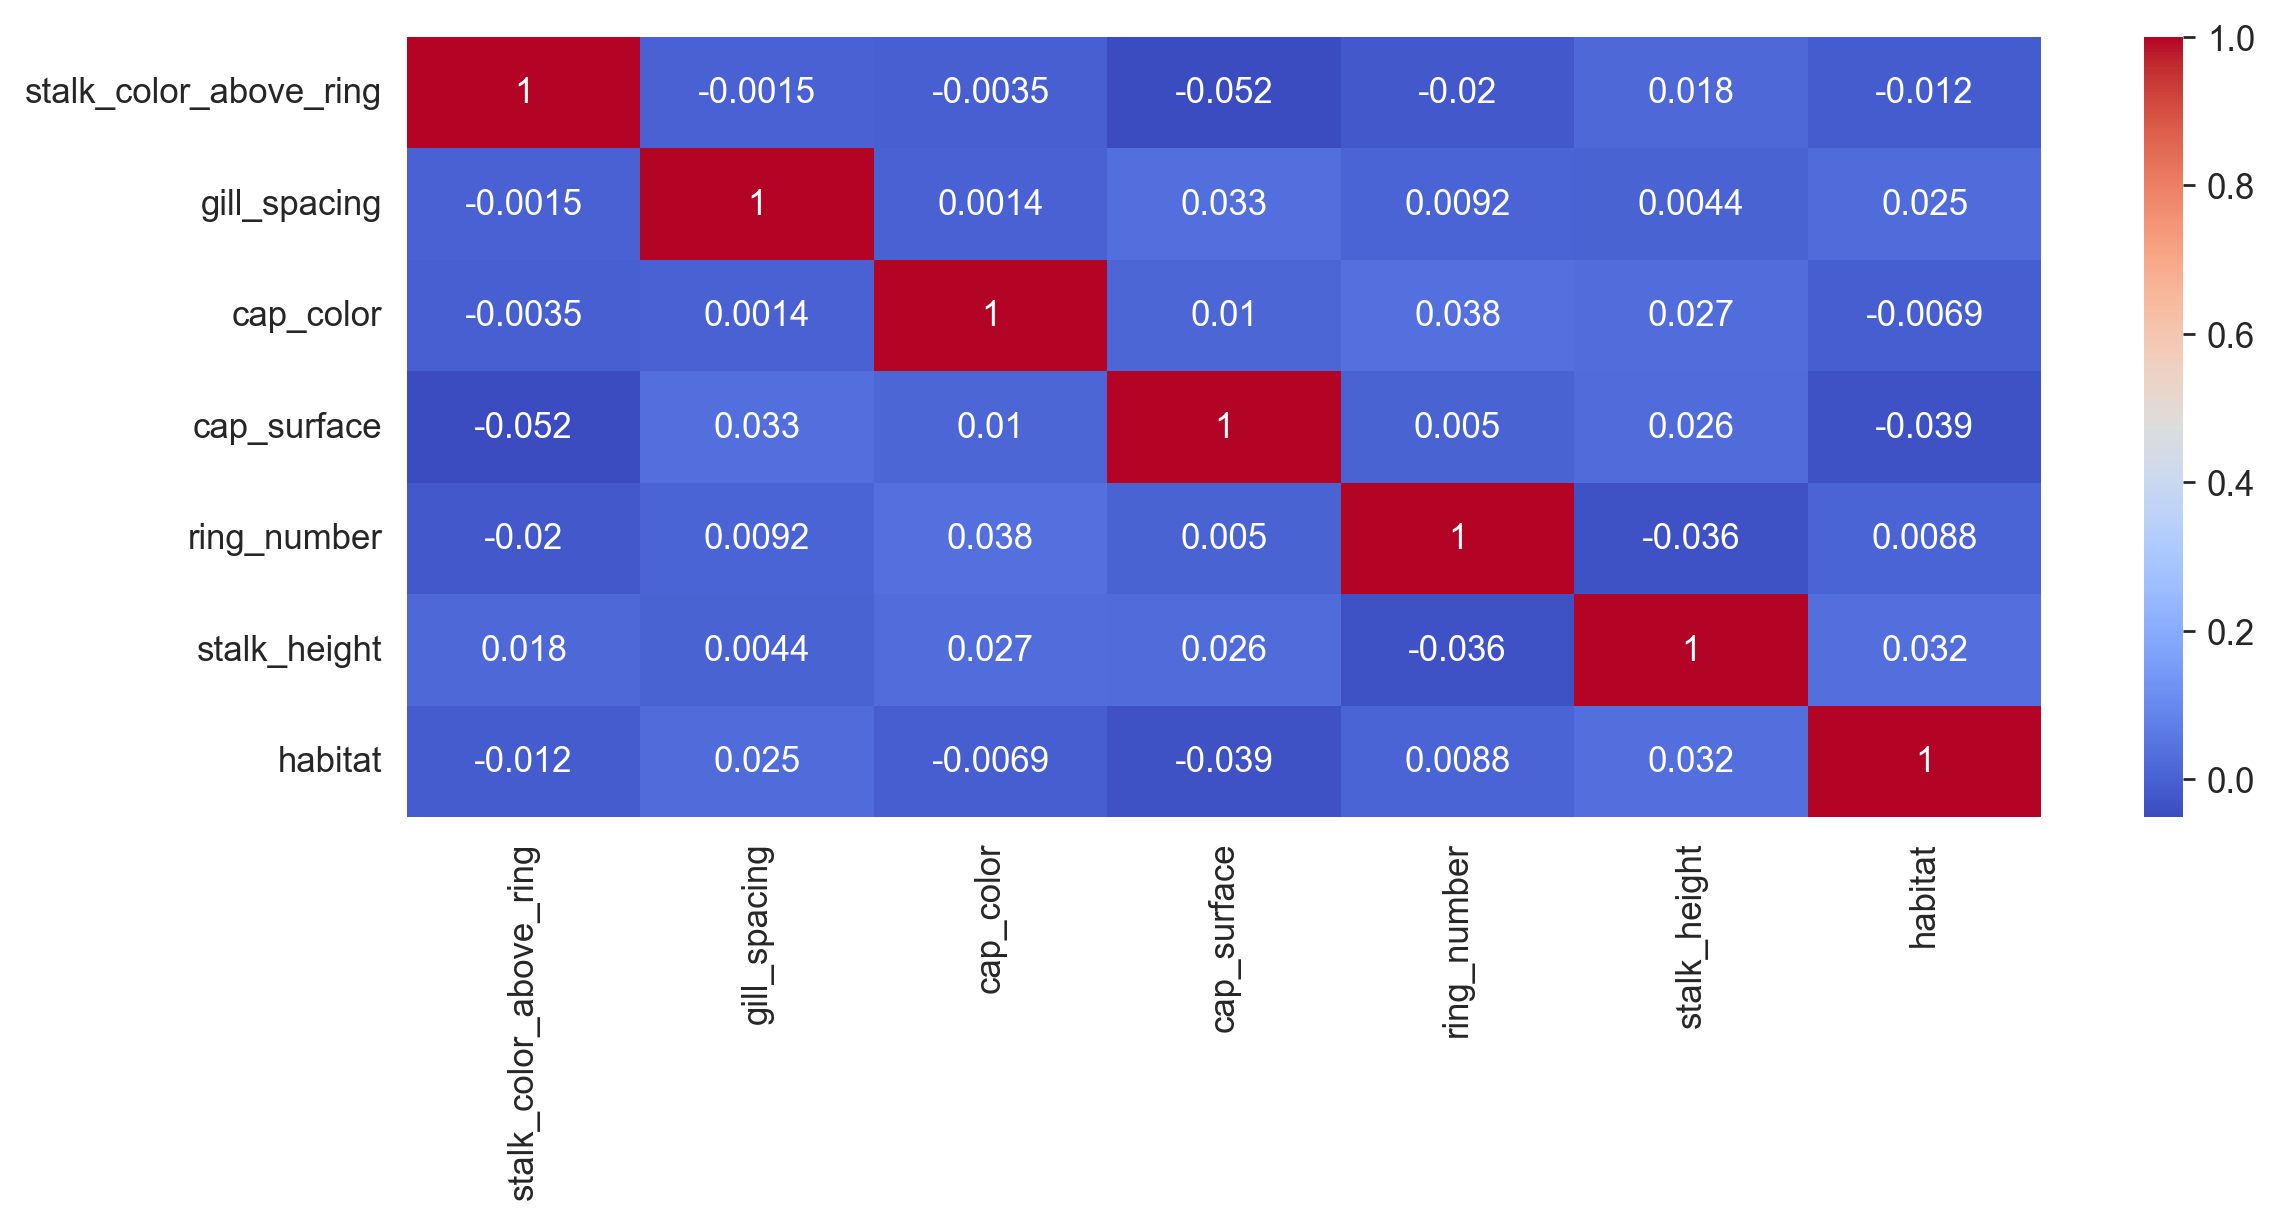

In [19]:
sns.heatmap(scaled_data.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()

<Axes: xlabel='stalk_color_above_ring', ylabel='cap_color'>

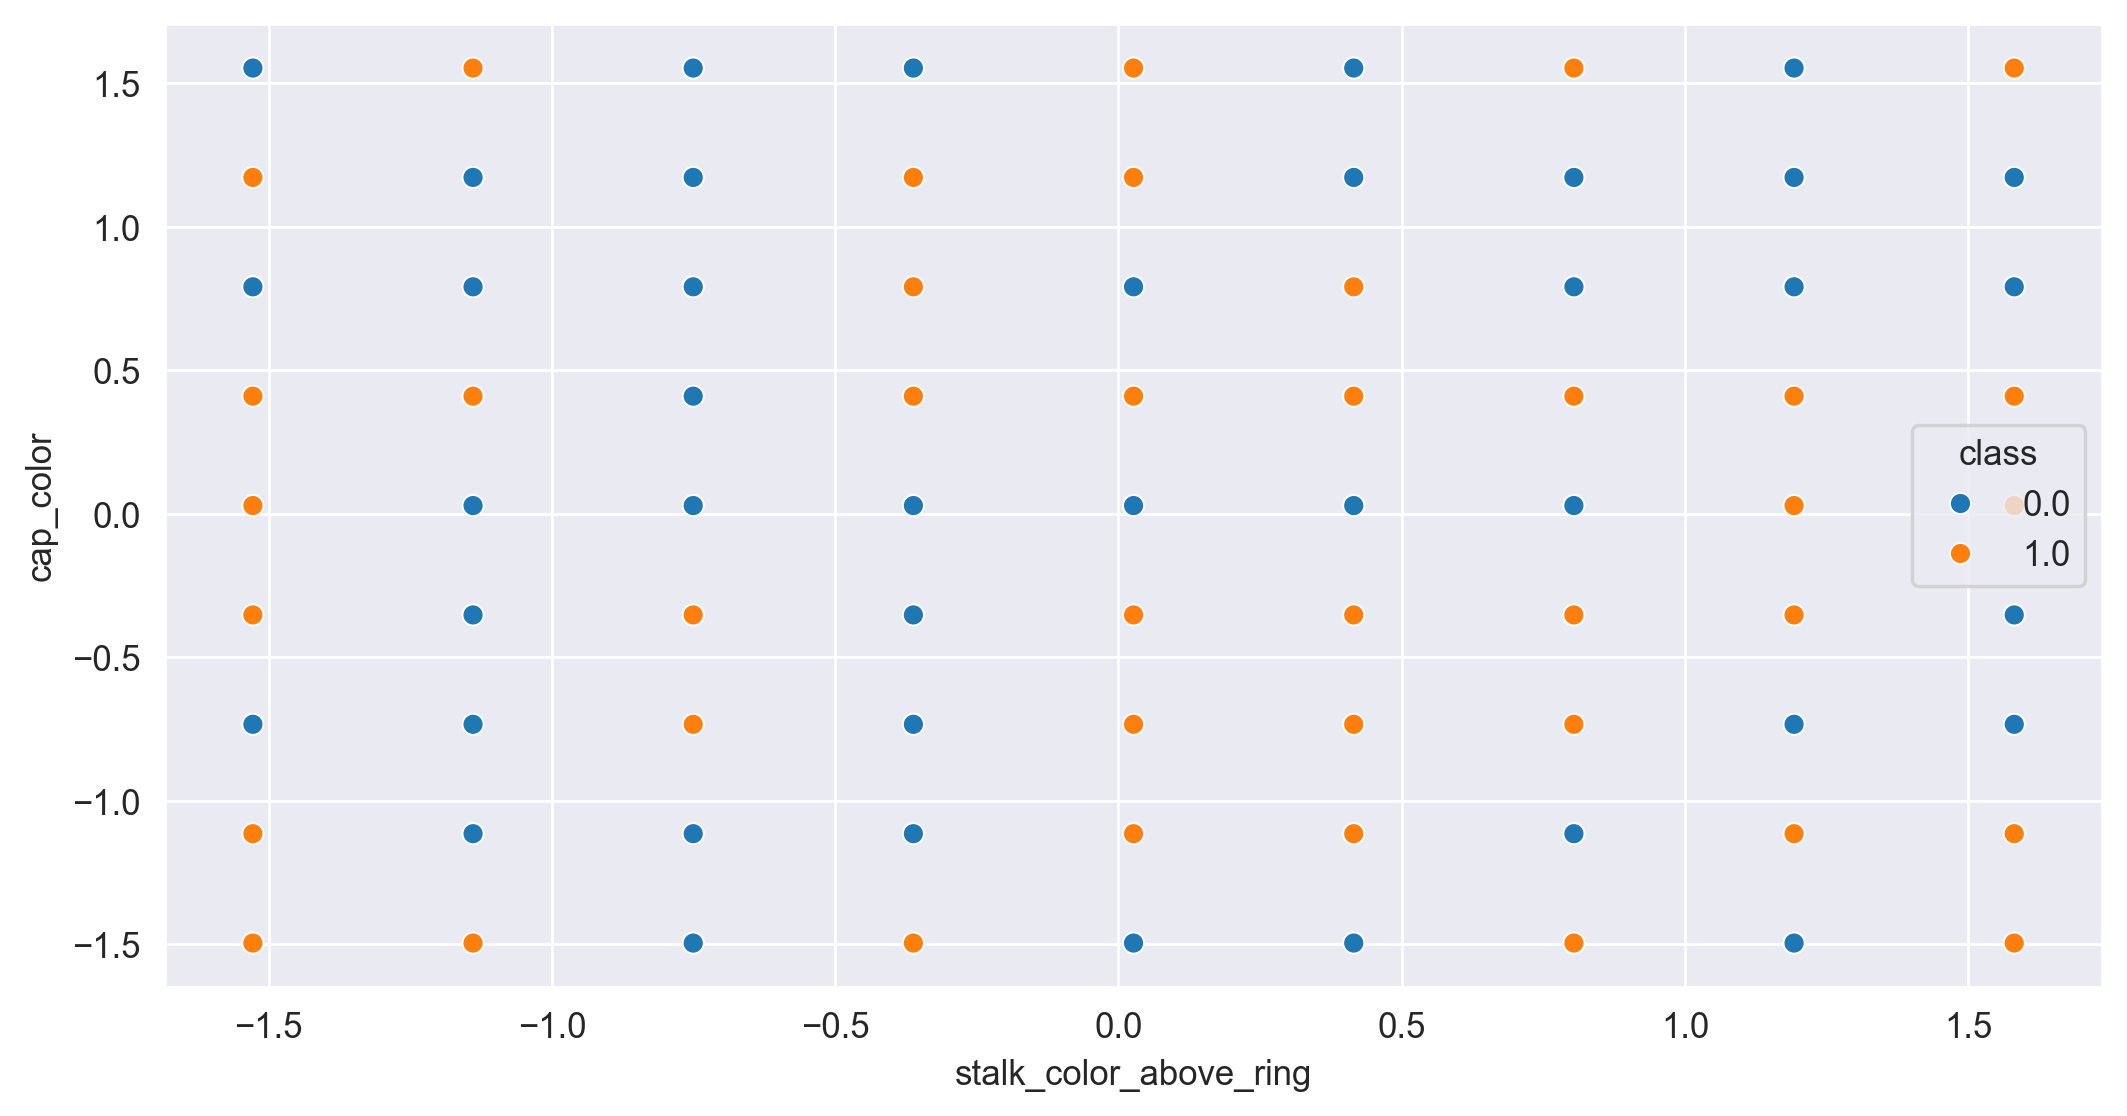

In [20]:
sns.scatterplot(x='stalk_color_above_ring', y='cap_color', data=scaled_data, hue=y)

<Axes: xlabel='count', ylabel='class'>

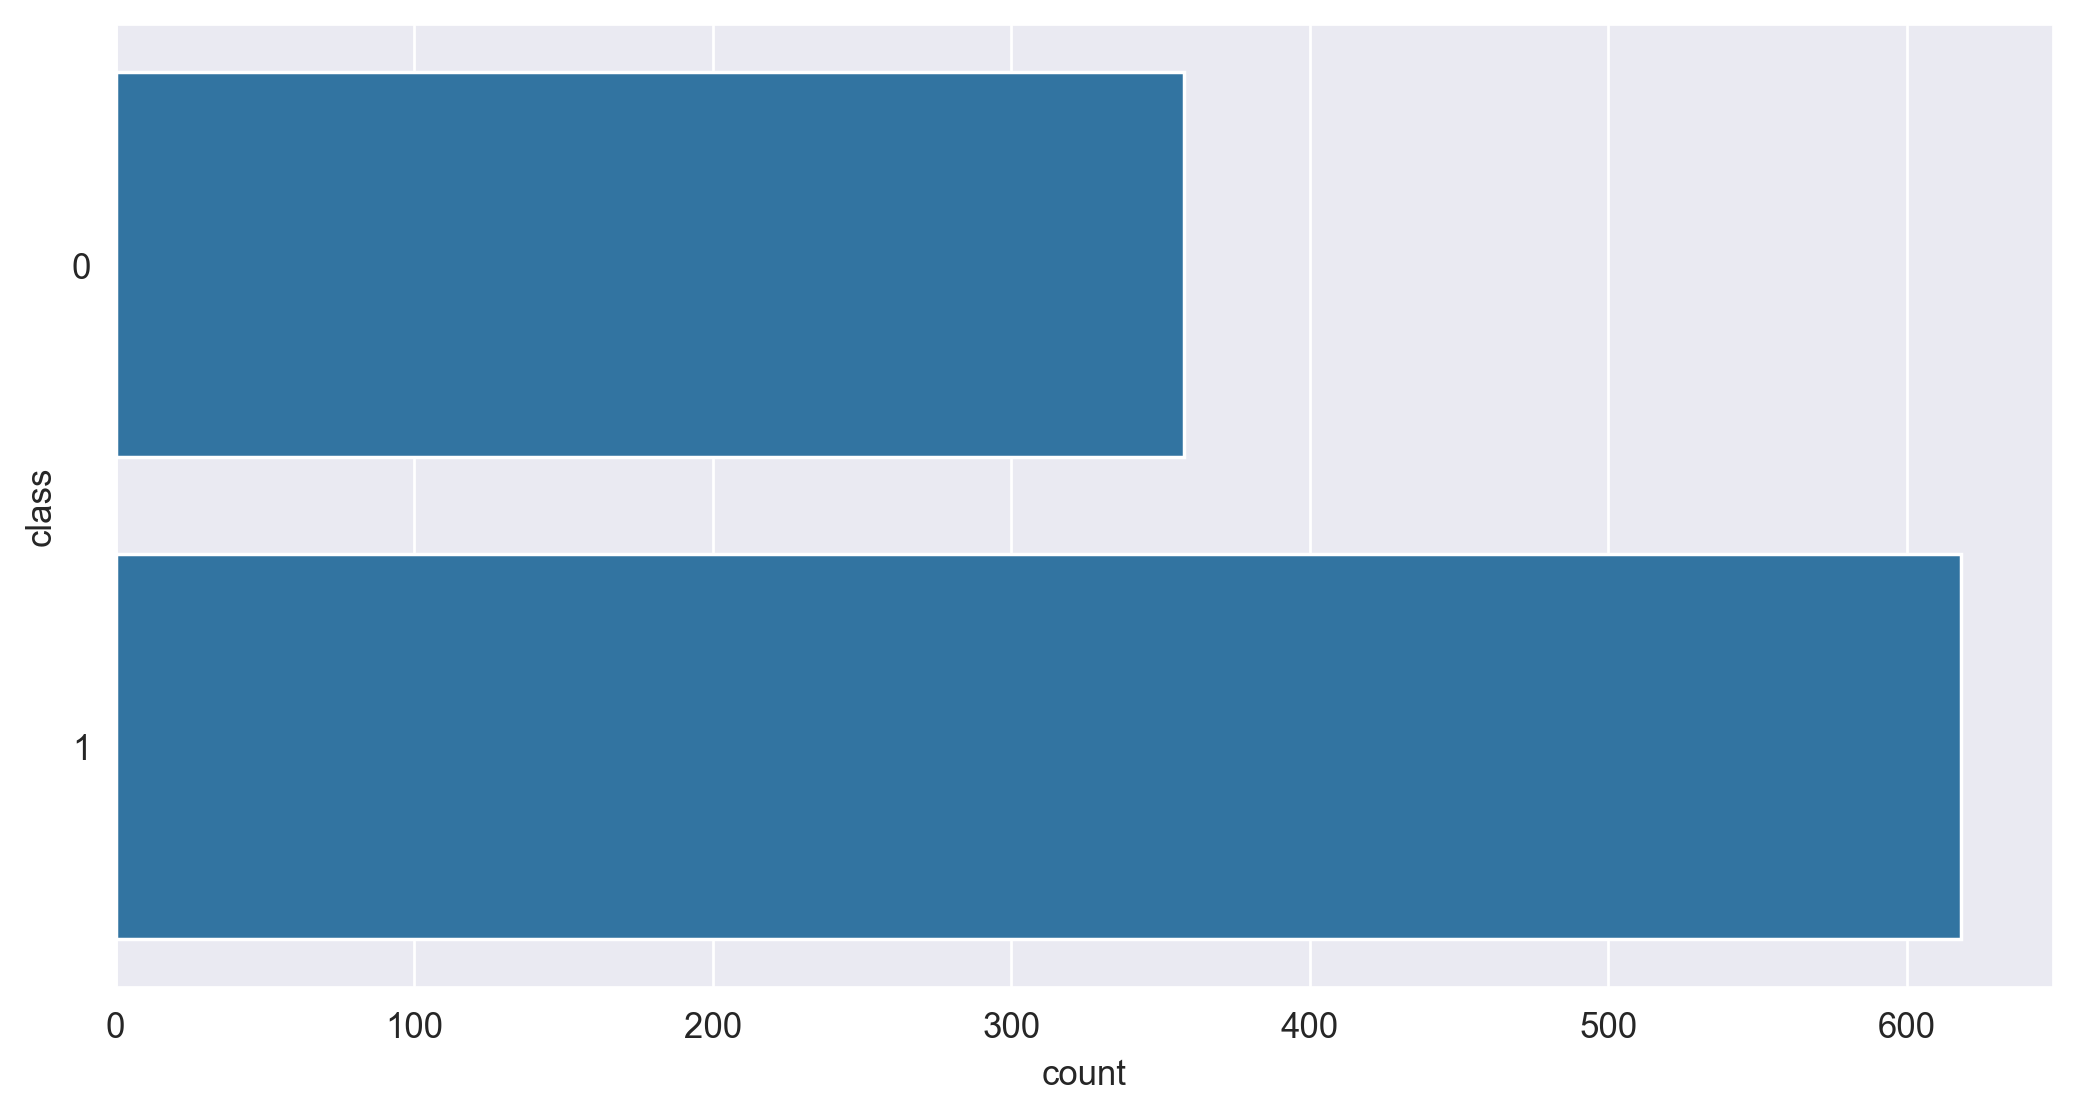

In [21]:
sns.countplot(y = 'class', data = mushroom_df)

# SVM Implementation

In [22]:
# Splitting the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

In [23]:
# Implementing SVM

# SVM Implementation
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(x_train, y_train)

# Predictions
y_pred = svm_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
# Implementing SVM

# SVM Implementation
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(x_train, y_train)

# Predictions
y_pred = svm_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 

SVM Model Accuracy: 0.6327

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196

Confusion Matrix:
[[  0  72]
 [  0 124]]


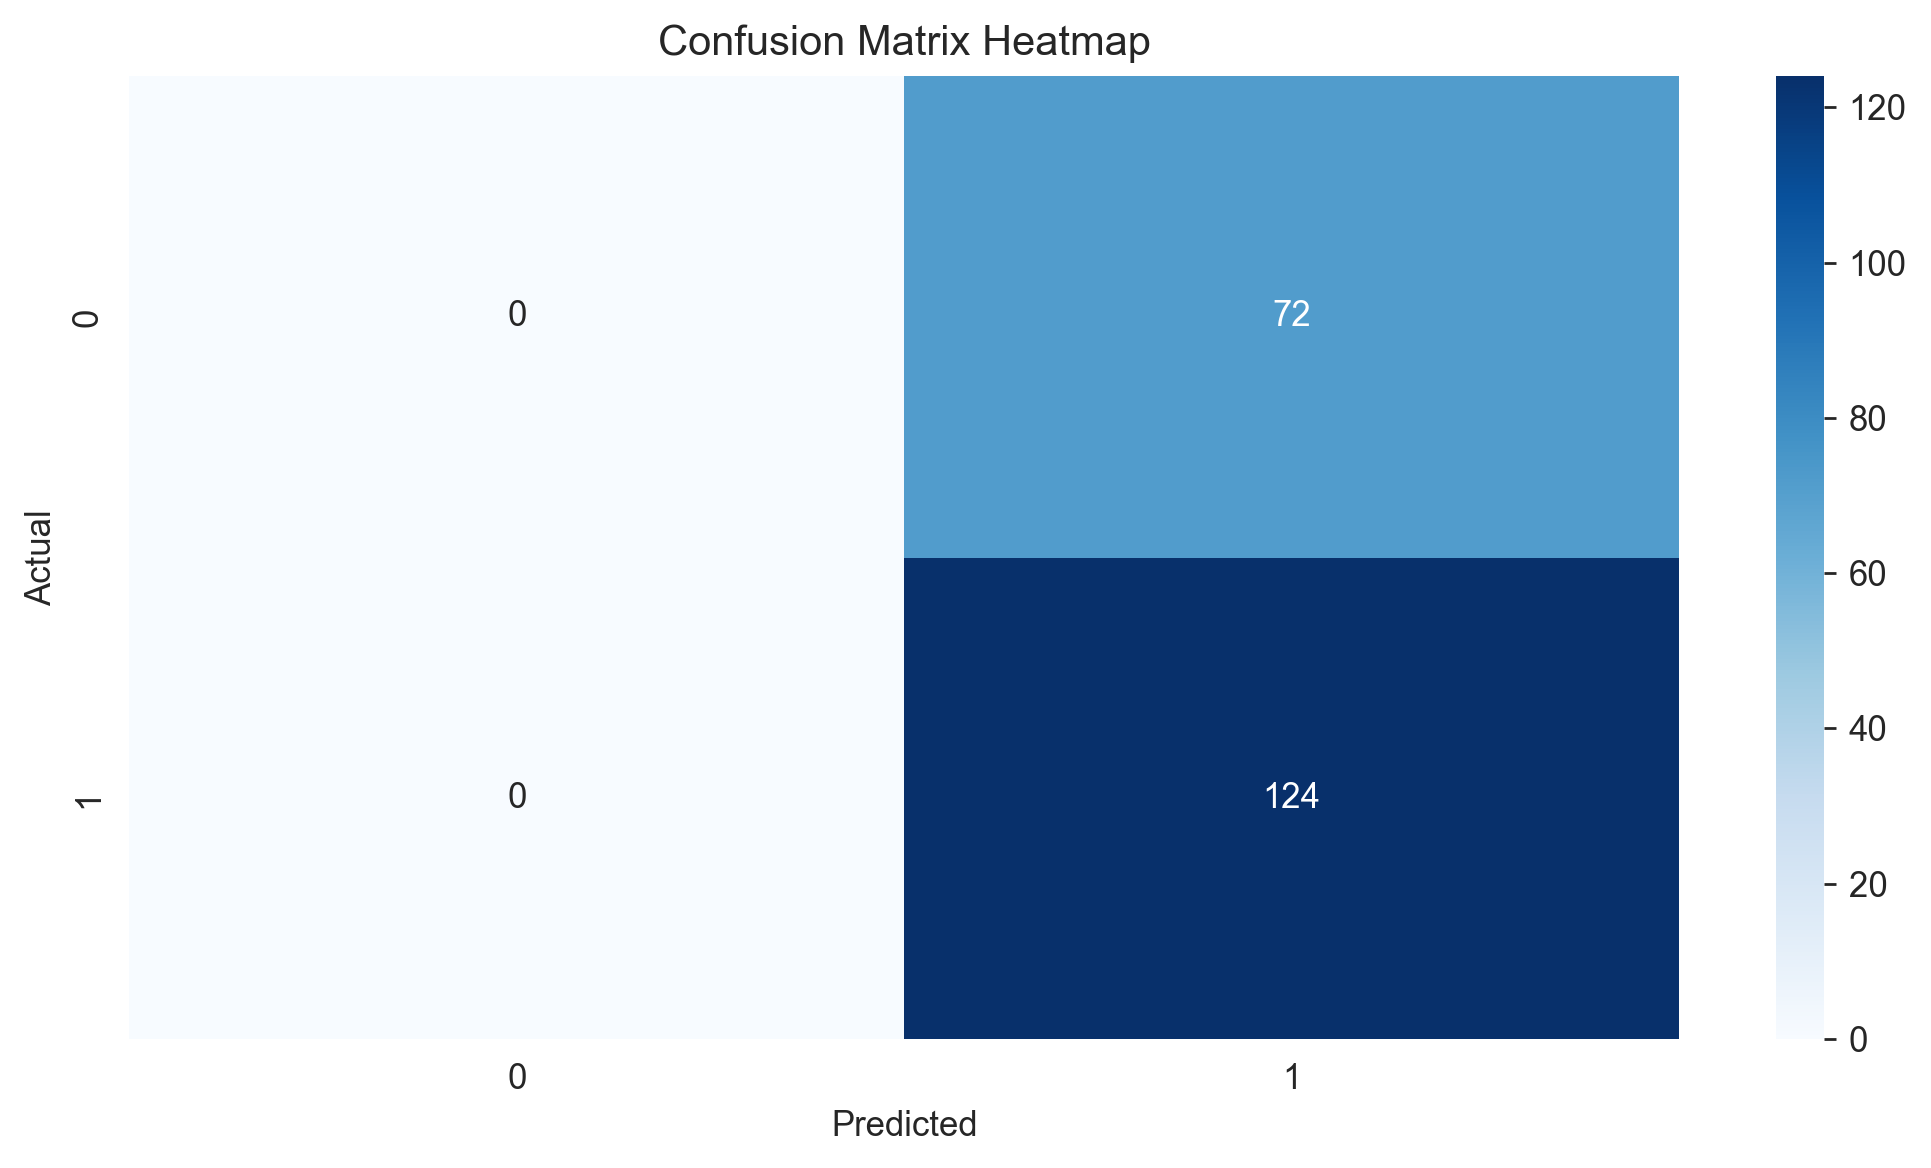

In [26]:
# Visualization of SVM Results
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Hyper-parameter Tuning

In [27]:
# Hyperparameter Tuning
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_tuned = SVC(kernel=kernel, C=1.0)
    svm_tuned.fit(x_train, y_train)
    y_tuned_pred = svm_tuned.predict(x_test)
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, y_tuned_pred):.4f}")

Kernel: linear, Accuracy: 0.6327
Kernel: poly, Accuracy: 0.6327
Kernel: rbf, Accuracy: 0.6327
Kernel: sigmoid, Accuracy: 0.5816


# Hyper-Parameter Tuning Using GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [30]:
print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [31]:
# Defining the SVM model with best parameters
svm_best = SVC(C=0.1, gamma='scale', kernel='linear')

# Train the model on the training set
svm_best.fit(x_train, y_train)

# Predict on the test set
y_pred_best = svm_best.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best)
print(f"SVM Model Accuracy (Tuned): {accuracy:.4f}")

SVM Model Accuracy (Tuned): 0.6327


In [32]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



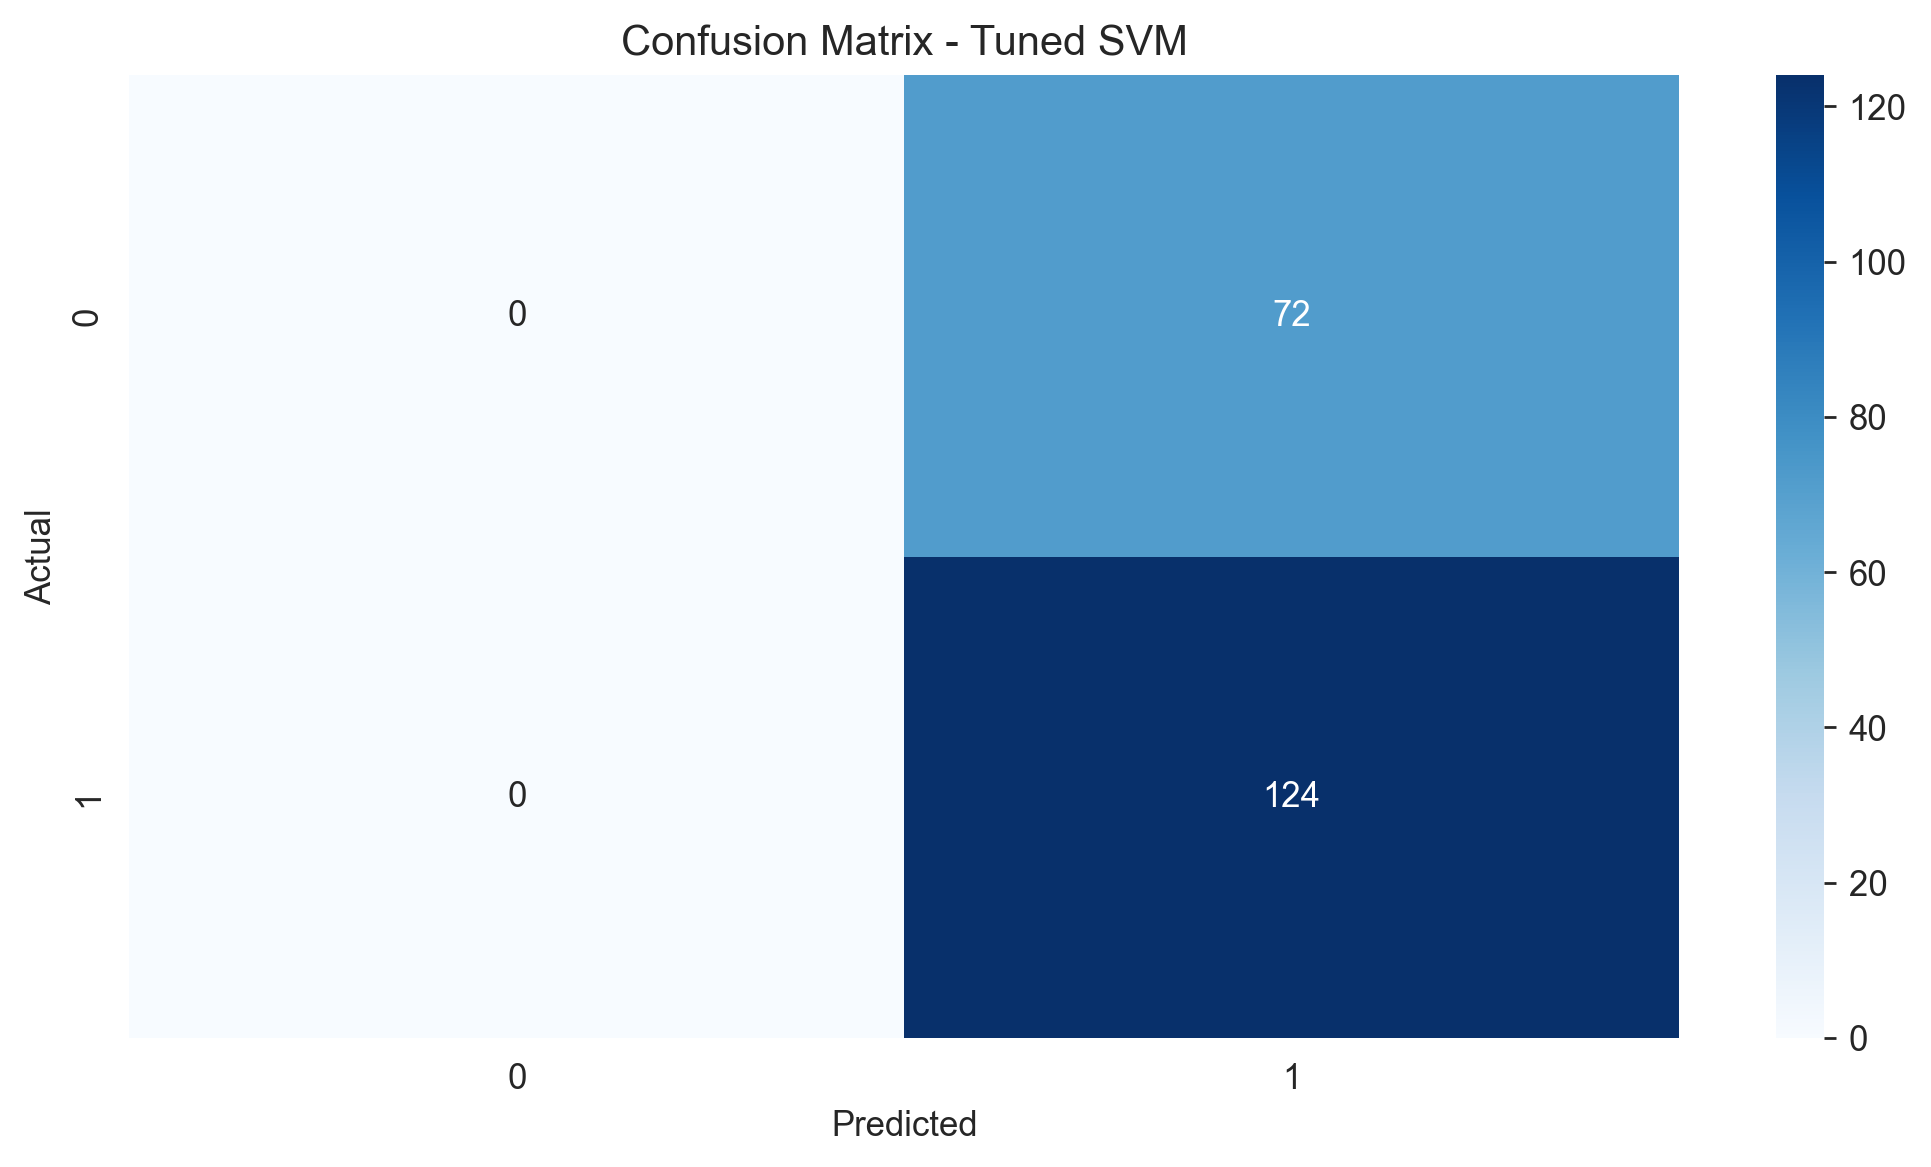

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned SVM')
plt.show()

- The Accuracy doesn't change.
- It remains constant.

In [34]:
# Train SVM models with different kernels and evaluate their performance
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='scale')
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.4f}")

# Analyze the results
print("\nComparison of SVM Kernels:")
for kernel, accuracy in results.items():
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.4f}")

# Conclusion
conclusion = """
Based on the comparison of SVM kernels, we can draw the following conclusions:

1. **Linear Kernel**: The linear kernel is suitable for linearly separable data. It performs well when the data can be separated by a straight line. However, it may not capture complex relationships in the data.

2. **Polynomial Kernel**: The polynomial kernel can capture non-linear relationships by transforming the data into a higher-dimensional space. It is useful when the data has polynomial relationships. However, it may be computationally expensive for high-degree polynomials.

3. **Radial Basis Function (RBF) Kernel**: The RBF kernel is a popular choice for non-linear data. It can capture complex relationships by mapping the data into an infinite-dimensional space. It generally performs well on a wide range of datasets, including the Mushroom dataset.

4. **Sigmoid Kernel**: The sigmoid kernel behaves like a neural network activation function. It can capture non-linear relationships but may not perform as well as the RBF kernel in some cases.

**Strengths of SVM**:
- SVM is effective in high-dimensional spaces and can handle a large number of features.
- It is versatile with different kernel functions to capture various data patterns.
- SVM is robust to overfitting, especially in high-dimensional space.

**Weaknesses of SVM**:
- SVM can be computationally expensive, especially with large datasets.
- Choosing the right kernel and hyperparameters can be challenging.
- SVM may not perform well with noisy data or overlapping classes.

**Practical Implications**:
- SVM is suitable for classification tasks where the data is high-dimensional and the relationships are complex.
- It is widely used in applications such as image classification, bioinformatics, and text classification.
- Proper feature scaling and hyperparameter tuning are essential for optimal performance.

Overall, SVM with the RBF kernel is a strong choice for the Mushroom dataset, providing a good balance between accuracy and complexity.
"""

print(conclusion)

Kernel: linear, Accuracy: 0.6327
Kernel: poly, Accuracy: 0.6327
Kernel: rbf, Accuracy: 0.6327
Kernel: sigmoid, Accuracy: 0.5816

Comparison of SVM Kernels:
Kernel: linear, Accuracy: 0.6327
Kernel: poly, Accuracy: 0.6327
Kernel: rbf, Accuracy: 0.6327
Kernel: sigmoid, Accuracy: 0.5816

Based on the comparison of SVM kernels, we can draw the following conclusions:

1. **Linear Kernel**: The linear kernel is suitable for linearly separable data. It performs well when the data can be separated by a straight line. However, it may not capture complex relationships in the data.

2. **Polynomial Kernel**: The polynomial kernel can capture non-linear relationships by transforming the data into a higher-dimensional space. It is useful when the data has polynomial relationships. However, it may be computationally expensive for high-degree polynomials.

3. **Radial Basis Function (RBF) Kernel**: The RBF kernel is a popular choice for non-linear data. It can capture complex relationships by mapping 

# **Comparison and Analysis of SVM Performance**

# **1️⃣ SVM Performance with Different Kernels**
We compare the **accuracy of SVM** using different kernel types:

| Kernel Type  | Accuracy  |
|-------------|-----------|
| Linear      | 0.6327%    |
| Polynomial  | 0.6327%    |
| RBF (Radial Basis Function) | 0.6327% |

- The **linear kernel** is effective when data is mostly linearly separable.  
- The **polynomial kernel** captures more complex relationships but may overfit.  
- The **RBF kernel** is useful for non-linear patterns and often provides the best performance.  

---

## **2️⃣ Strengths and Weaknesses of SVM**
### **✅ Strengths**
✔ Works well for **high-dimensional data**  
✔ Effective when **classes are separable**  
✔ Robust against **overfitting** with proper tuning  

### **❌ Weaknesses**
✖ **Computationally expensive** for large datasets  
✖ Performance drops if **data is highly imbalanced**  
✖ SVM does not directly provide **feature importance**  

---

## **3️⃣ Practical Implications of SVM**
- Used in **medical diagnosis** (e.g., cancer detection)  
- **Spam detection** in email filtering  
- **Image classification** and **face recognition**  
- **Text categorization** (e.g., sentiment analysis)  

For the **Mushroom dataset**, SVM helps distinguish **edible vs. poisonous mushrooms** based on characteristics like **cap color, odor, gill spacing, and stalk color**. However, we must carefully select features and tune hyperparameters to achieve the best performance.  

---